In [1]:
# we first load the class module

import dipolarBEC


In [2]:
# then python modules

from tqdm import tqdm
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True
import seaborn
font = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 16}
mpl.rc('font', **font)

pal = seaborn.color_palette("tab10")
print(pal.as_hex())

# if seaborn does not work, try: pip install seaborn

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


In [23]:
# viscosity vs t for a fixed Ud/Uc, Ntubes, sigma, ny

Ntubes = 2
kx_small = 1.e-3
kx_large = 20.0
Uc = 1.0
Ud_1 = 0.25
Ud_2 = 0.5
Ud_3 = 0.75
Ndisr = 100
sigma = 0.0
Nmesh = 100
ny = Ntubes-1

tdar = np.linspace(0, 0.01, 50)
kxar = np.linspace(kx_small, kx_large, Nmesh)

def intg(kxar,far):
    intg = (kxar[-1]-kxar[0])*np.sum(far)/len(kxar)
    return intg

visc1_t = []
visc2_t = []
visc3_t = []

nb = np.random.uniform(1-sigma, 1+sigma, Ntubes)

for t in tqdm(tdar):
    visc1_kx = []
    visc2_kx = []
    visc3_kx = []
    for kx in kxar:
        run1_k = dipolarBEC.dipolarBEC(Ntubes, kx, Uc, Ud_1, Ndisr, sigma, NN_int=True)
        run2_k = dipolarBEC.dipolarBEC(Ntubes, kx, Uc, Ud_2, Ndisr, sigma, NN_int=True)
        run3_k = dipolarBEC.dipolarBEC(Ntubes, kx, Uc, Ud_3, Ndisr, sigma, NN_int=True)
        visc1_kx.append( run1_k.visc_k_time(ny,t,nb) )
        visc2_kx.append( run2_k.visc_k_time(ny,t,nb) )
        visc3_kx.append( run3_k.visc_k_time(ny,t,nb) )
    visc1_t.append( intg(kxar,visc1_kx) )
    visc2_t.append( intg(kxar,visc2_kx) )
    visc3_t.append( intg(kxar,visc3_kx) )


  0%|          | 0/50 [00:00<?, ?it/s]

100%|██████████| 50/50 [00:33<00:00,  1.50it/s]


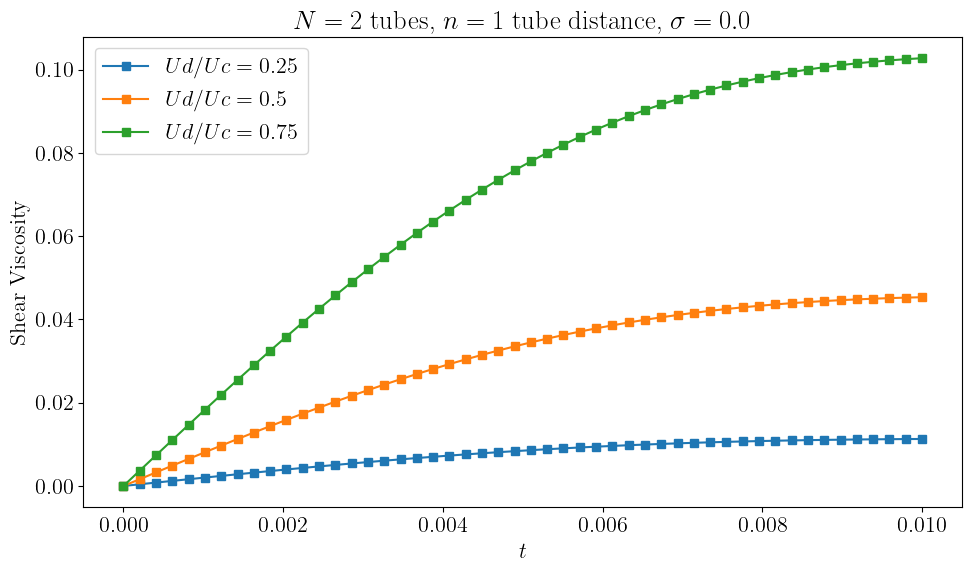

In [24]:
plt.figure(figsize=(10,6))
plt.xlabel(r"$t$")
plt.ylabel(r"Shear Viscosity")
plt.plot(tdar, visc1_t, label=r'$Ud/Uc = {}$'.format(Ud_1), marker='s')
plt.plot(tdar, visc2_t, label=r'$Ud/Uc = {}$'.format(Ud_2), marker='s')
plt.plot(tdar, visc3_t, label=r'$Ud/Uc = {}$'.format(Ud_3), marker='s')
plt.legend(loc='best')
plt.title(r"$N = {}$ tubes, $n = {}$ tube distance, $\sigma = {}$".format(Ntubes,ny, sigma))

plt.tight_layout()
#plt.savefig(os.path.join(fpath, r'visc_vs_t_2ud.pdf'), format='pdf', bbox_inches='tight') # uncomment to save the figure


plt.show()

In [28]:
Udar = np.linspace(0.0, 2.0, 10)
t = 0.1
visc1_t = []
for Ud in tqdm(Udar):
    visc1_kx = []
    for kx in kxar:
        run1_k = dipolarBEC.dipolarBEC(Ntubes, kx, Uc, Ud, Ndisr, sigma, NN_int=True)
        visc1_kx.append( run1_k.visc_k_time(ny,t,nb) )
    visc1_t.append( intg(kxar,visc1_kx) )
 

100%|██████████| 10/10 [00:01<00:00,  7.08it/s]


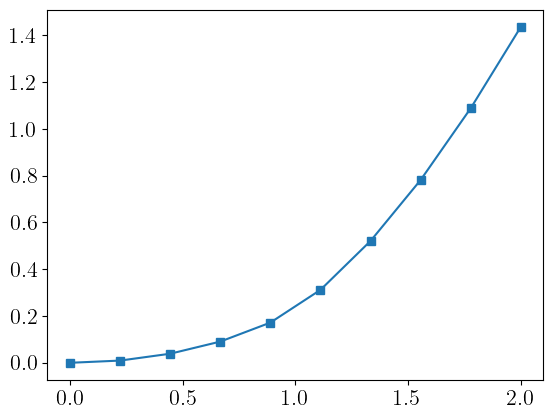

In [29]:
plt.plot(Udar, visc1_t, label=r'$t = {}$'.format(t), marker='s')
plt.show()

In [17]:
# fourier transform of viscosity vs omega for a fixed Ud/Uc, Ntubes, sigma, ny

Ntubes = 2
kx_small = 0.001
kx_large = 20.0
Uc = 1.0
Ud_1 = 0.0
Ud_2 = 0.25
Ud_3 = 0.5
Ndisr = 100
sigma = 0.5
Nmesh = 100
ny = Ntubes-1

odar = np.arange(-5, 5, 0.1)
kxar = np.linspace(kx_small, kx_large, Nmesh)

def intg(kxar,far):
    intg = (kxar[-1]-kxar[0])*np.sum(far)/len(kxar)
    return intg

visc1_or = []
visc1_oi = []
visc2_or = []
visc2_oi = []
visc2_kx = []
visc3_or = []
visc3_oi = []
visc3_kx = []

nb = np.random.uniform(1-sigma, 1+sigma, Ntubes)
Gamma = 0.1


for o in tqdm(odar):
    visc1_kx = []
    visc2_kx = []
    visc3_kx = []

    for kx in kxar:
        run1_k = dipolarBEC.dipolarBEC(Ntubes, kx, Uc, Ud_1, Ndisr, sigma, NN_int = True)
        run2_k = dipolarBEC.dipolarBEC(Ntubes, kx, Uc, Ud_2, Ndisr, sigma, NN_int = True)
        run3_k = dipolarBEC.dipolarBEC(Ntubes, kx, Uc, Ud_3, Ndisr, sigma, NN_int = True)
        visc1_kx.append( run1_k.visc_k_om(ny,o, nb, Gamma ) )
        visc2_kx.append( run2_k.visc_k_om(ny,o, nb, Gamma) )
        visc3_kx.append( run3_k.visc_k_om(ny,o, nb, Gamma) )
    visc1_or.append( np.real(intg(kxar,visc1_kx)) )
    visc2_or.append( np.real(intg(kxar,visc2_kx)) )
    visc3_or.append( np.real(intg(kxar,visc3_kx)) )
    visc1_oi.append( np.imag(intg(kxar,visc1_kx)) )
    visc2_oi.append( np.imag(intg(kxar,visc2_kx)) )
    visc3_oi.append( np.imag(intg(kxar,visc3_kx)) )

100%|██████████| 100/100 [00:54<00:00,  1.85it/s]


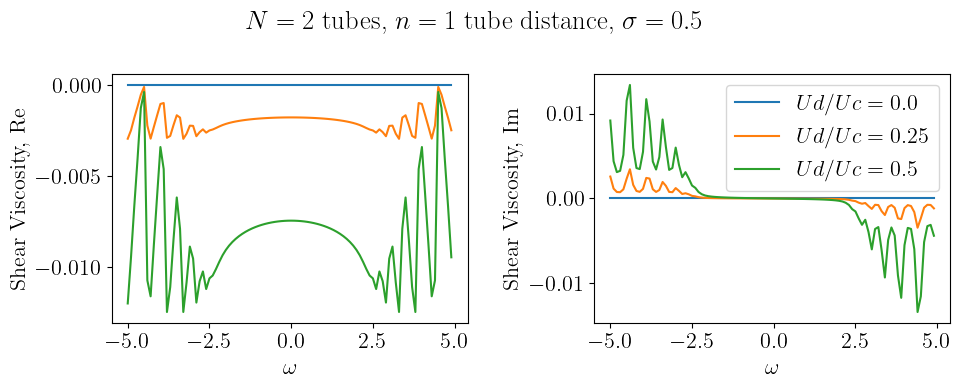

In [20]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))
ax1.set_xlabel(r"$\omega$")
ax1.set_ylabel(r"Shear Viscosity, Re")
ax1.plot(odar, visc1_or, label=r'$Ud/Uc = {}$'.format(Ud_1))
ax1.plot(odar, visc2_or, label=r'$Ud/Uc = {}$'.format(Ud_2))
ax1.plot(odar, visc3_or, label=r'$Ud/Uc = {}$'.format(Ud_3))
ax2.set_xlabel(r"$\omega$")
ax2.set_ylabel(r"Shear Viscosity, Im")
ax2.plot(odar, visc1_oi, label=r'$Ud/Uc = {}$'.format(Ud_1))
ax2.plot(odar, visc2_oi, label=r'$Ud/Uc = {}$'.format(Ud_2))
ax2.plot(odar, visc3_oi, label=r'$Ud/Uc = {}$'.format(Ud_3))
plt.legend(loc='best')
fig.suptitle(r"$N = {}$ tubes, $n = {}$ tube distance, $\sigma = {}$".format(Ntubes,ny, sigma))

fig.tight_layout()
#plt.savefig(os.path.join(fpath, r'visc_vs_om_2ud_sig={}_N={}.pdf'.format(sigma,Ntubes)), format='pdf', bbox_inches='tight') # uncomment to save the figure


plt.show()

In [25]:
# viscosity vs t for a fixed Ud/Uc, Ntubes, sigma, ny

Ntubes = 2
kx_small = 1.e-3
kx_large = 20.0
Uc = 1.0
Ud_1 = 0.25
Ud_2 = 0.5
Ud_3 = 0.75
Ndisr = 100
sigma = 0.0
Nmesh = 100
ny = Ntubes-1

tdar = np.linspace(0, 0.01, 50)
kxar = np.linspace(kx_small, kx_large, Nmesh)

def intg(kxar,far):
    intg = (kxar[-1]-kxar[0])*np.sum(far)/len(kxar)
    return intg

visc1_t = []
visc2_t = []
visc3_t = []

nb = np.random.uniform(1-sigma, 1+sigma, Ntubes)

for t in tqdm(tdar):
    visc1_kx = []
    visc2_kx = []
    visc3_kx = []
    for kx in kxar:
        run1_k = dipolarBEC.dipolarBEC(Ntubes, kx, Uc, Ud_1, Ndisr, sigma, NN_int=False)
        run2_k = dipolarBEC.dipolarBEC(Ntubes, kx, Uc, Ud_2, Ndisr, sigma, NN_int=False)
        run3_k = dipolarBEC.dipolarBEC(Ntubes, kx, Uc, Ud_3, Ndisr, sigma, NN_int=False)
        visc1_kx.append( run1_k.visc_k_time(ny,t,nb) )
        visc2_kx.append( run2_k.visc_k_time(ny,t,nb) )
        visc3_kx.append( run3_k.visc_k_time(ny,t,nb) )
    visc1_t.append( intg(kxar,visc1_kx) )
    visc2_t.append( intg(kxar,visc2_kx) )
    visc3_t.append( intg(kxar,visc3_kx) )


100%|██████████| 50/50 [00:36<00:00,  1.38it/s]


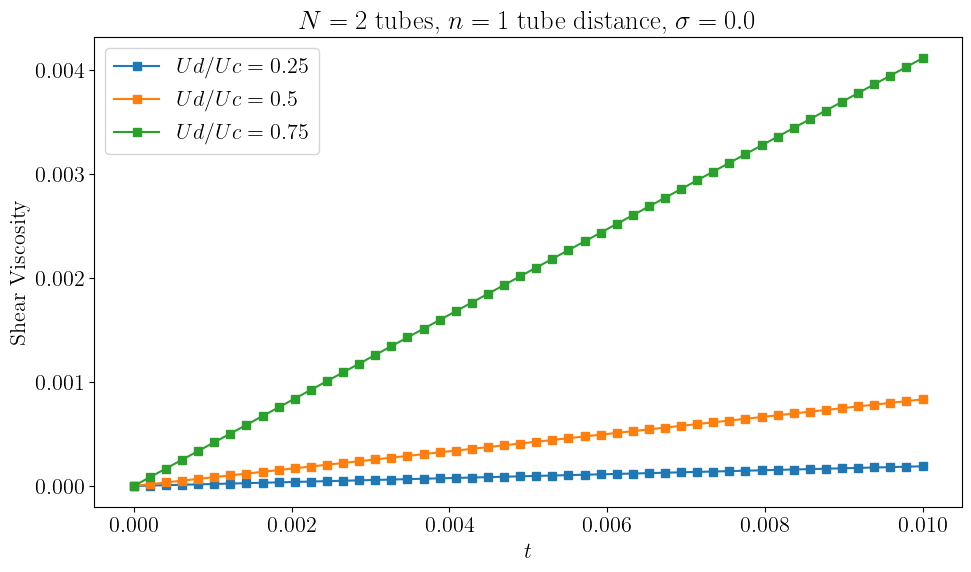

In [26]:
plt.figure(figsize=(10,6))
plt.xlabel(r"$t$")
plt.ylabel(r"Shear Viscosity")
plt.plot(tdar, visc1_t, label=r'$Ud/Uc = {}$'.format(Ud_1), marker='s')
plt.plot(tdar, visc2_t, label=r'$Ud/Uc = {}$'.format(Ud_2), marker='s')
plt.plot(tdar, visc3_t, label=r'$Ud/Uc = {}$'.format(Ud_3), marker='s')
plt.legend(loc='best')
plt.title(r"$N = {}$ tubes, $n = {}$ tube distance, $\sigma = {}$".format(Ntubes,ny, sigma))

plt.tight_layout()
#plt.savefig(os.path.join(fpath, r'visc_vs_t_2ud.pdf'), format='pdf', bbox_inches='tight') # uncomment to save the figure


plt.show()